Dataset: .. _iris_dataset:
Features: 4 Samples: 150 Classes: ['setosa' 'versicolor' 'virginica']
Train/Test split: 80%/20%

=== Logistic Regression ===
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     0.9000    0.9000    0.9000        10
   virginica     0.9000    0.9000    0.9000        10

    accuracy                         0.9333        30
   macro avg     0.9333    0.9333    0.9333        30
weighted avg     0.9333    0.9333    0.9333        30


=== K-Nearest Neighbors (k=5) ===
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     0.8333    1.0000    0.9091        10
   virginica     1.0000    0.8000    0.8889        10

    accuracy                         0.9333        30
   macro avg     0.9444    0.9333    0.9327        30
weighted avg     0.9444    0.9333    0.9327        30


=== SVM (RBF) ==

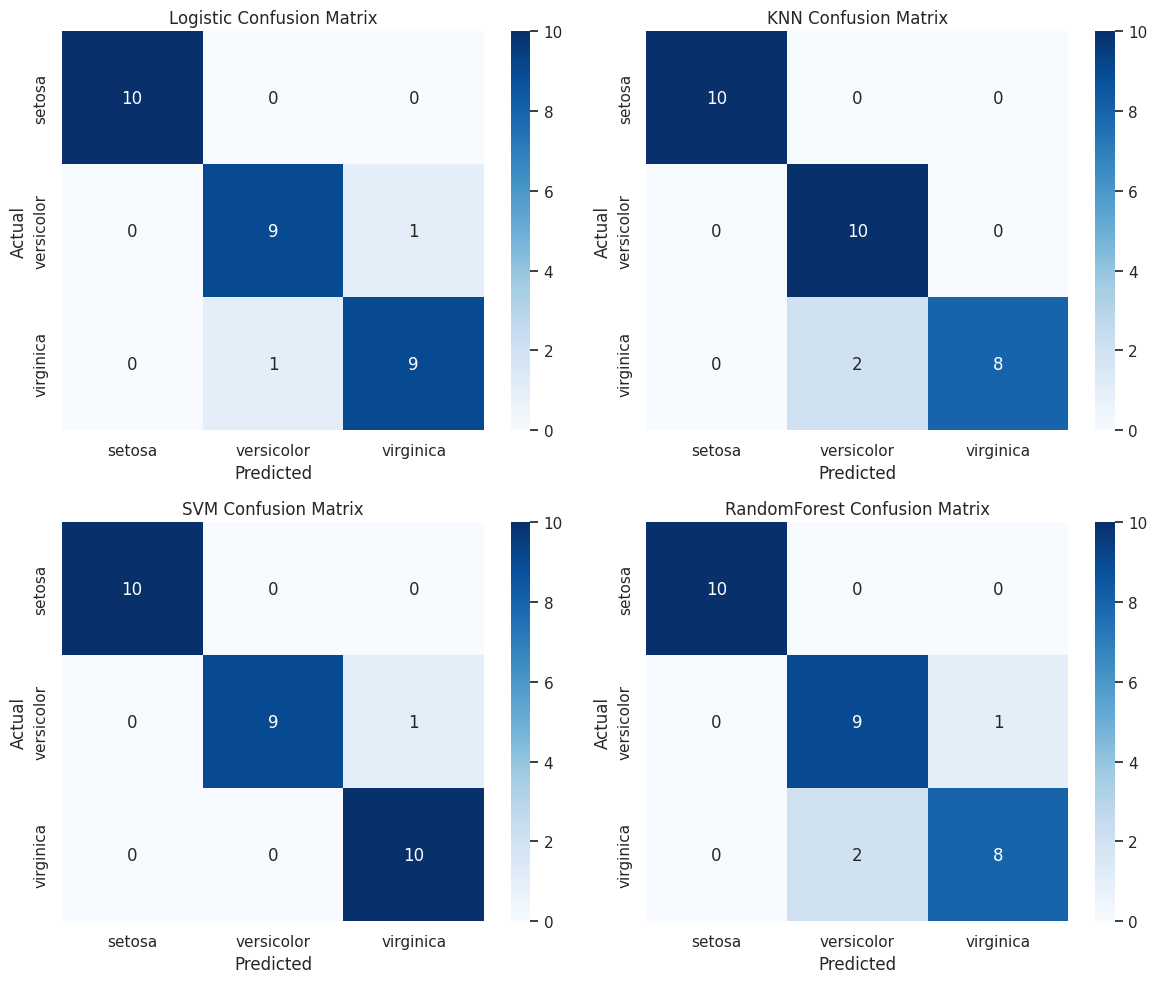


=== Summary ===
          Algorithm  Accuracy Accuracy_pct
Logistic Regression  0.933333       93.33%
          KNN (k=5)  0.933333       93.33%
          SVM (RBF)  0.966667       96.67%
Random Forest (100)  0.900000        90.0%

Interpretation:
- The Iris dataset is clean, balanced and often easily separable; many models achieve very high accuracy.
- Best accuracy: SVM (RBF) (96.67%)
- For small clean datasets: SVM or Logistic are excellent. KNN performs well with scaling. Random Forest is robust and stable.


In [3]:
# mini_project_iris_comparison.py
# Comparing Accuracy and Classification Report of Logistic Regression, KNN, SVM, Random Forest
# Dataset: sklearn.datasets.load_iris
# Run this as a single script or cell.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")

def main():
    # ------------------------
    # BLOCK 1 — Config & Load
    # ------------------------
    random_state = 42
    test_size = 0.20

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names

    print("Dataset:", iris.DESCR.splitlines()[0])
    print("Features:", X.shape[1], "Samples:", X.shape[0], "Classes:", target_names)
    print("Train/Test split: {:.0%}/{:.0%}".format(1-test_size, test_size))

    # ------------------------
    # BLOCK 2 — Split & Scale
    # ------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ------------------------
    # BLOCK 3 — Logistic Regression
    # ------------------------
    logreg = LogisticRegression(max_iter=2000, random_state=random_state)
    logreg.fit(X_train_scaled, y_train)
    y_pred_log = logreg.predict(X_test_scaled)
    acc_log = accuracy_score(y_test, y_pred_log)
    print("\n=== Logistic Regression ===")
    print("Accuracy: {:.4f}".format(acc_log))
    print(classification_report(y_test, y_pred_log, target_names=target_names, digits=4))

    # ------------------------
    # BLOCK 4 — K-Nearest Neighbors (k=5)
    # ------------------------
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    print("\n=== K-Nearest Neighbors (k=5) ===")
    print("Accuracy: {:.4f}".format(acc_knn))
    print(classification_report(y_test, y_pred_knn, target_names=target_names, digits=4))

    # ------------------------
    # BLOCK 5 — Support Vector Machine (RBF)
    # ------------------------
    svm = SVC(kernel='rbf', probability=True, random_state=random_state)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    print("\n=== SVM (RBF) ===")
    print("Accuracy: {:.4f}".format(acc_svm))
    print(classification_report(y_test, y_pred_svm, target_names=target_names, digits=4))

    # ------------------------
    # BLOCK 6 — Random Forest (100 trees)
    # ------------------------
    rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    print("\n=== Random Forest (100 trees) ===")
    print("Accuracy: {:.4f}".format(acc_rf))
    print(classification_report(y_test, y_pred_rf, target_names=target_names, digits=4))

    # ------------------------
    # BLOCK 7 — Confusion Matrices (visual)
    # ------------------------
    models_preds = {
        "Logistic": y_pred_log,
        "KNN": y_pred_knn,
        "SVM": y_pred_svm,
        "RandomForest": y_pred_rf
    }

    plt.figure(figsize=(12, 10))
    i = 1
    for name, preds in models_preds.items():
        cm = confusion_matrix(y_test, preds)
        plt.subplot(2, 2, i)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=target_names, yticklabels=target_names)
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        i += 1
    plt.tight_layout()
    plt.show()

    # ------------------------
    # BLOCK 8 — Summary Table & Interpretation
    # ------------------------
    results = pd.DataFrame({
        "Algorithm": ["Logistic Regression", "KNN (k=5)", "SVM (RBF)", "Random Forest (100)"],
        "Accuracy": [acc_log, acc_knn, acc_svm, acc_rf]
    })
    results["Accuracy_pct"] = (results["Accuracy"] * 100).round(2).astype(str) + '%'

    print("\n=== Summary ===")
    print(results.to_string(index=False))

    # Interpretation notes
    print("\nInterpretation:")
    print("- The Iris dataset is clean, balanced and often easily separable; many models achieve very high accuracy.")
    best_idx = results["Accuracy"].idxmax()
    print(f"- Best accuracy: {results.loc[best_idx,'Algorithm']} ({results.loc[best_idx,'Accuracy_pct']})")
    print("- For small clean datasets: SVM or Logistic are excellent. KNN performs well with scaling. Random Forest is robust and stable.")

if __name__ == "__main__":
    main()
